In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import os

In [5]:
cd = os.getcwd()
parent = os.path.dirname(cd)
data_folder = os.path.join(parent, 'data')
data_file = os.path.join(data_folder, 'dev.csv')
df = pd.read_csv(data_file)
df.head()
len(df)

39744

In [6]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
df['year'] = df['datetime_utc'].dt.year
df['month'] = df['datetime_utc'].dt.month
df['day'] = df['datetime_utc'].dt.day
df['hour'] = df['datetime_utc'].dt.hour
df['minute'] = df['datetime_utc'].dt.minute
df['second'] = df['datetime_utc'].dt.second
df_no_datetime = df.copy().drop(columns=['datetime_utc'])

#count all NaN values in each column
df_no_datetime.isnull().sum()

#count NaN values in turb_fnu
max_null = df_no_datetime['turb_fnu'].isnull().sum()
print("Percentage of Null values in turb_fnu: ", (max_null/len(df_no_datetime))*100)

#drop all rows with NaN values
df_no_datetime = df_no_datetime.dropna()
df_no_datetime.isnull().sum()

Percentage of Null values in turb_fnu:  6.202194041867955


wtempc             0
atempc             0
winddir_dcfn       0
precp_in           0
relh_pct           0
spc                0
dox_mgl            0
ph                 0
windgust_knots     0
wse1988            0
wvel_fps           0
mbars              0
windspeed_knots    0
par                0
turb_fnu           0
year               0
month              0
day                0
hour               0
minute             0
second             0
dtype: int64

In [20]:
# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_no_datetime)

# Step 3: Apply PCA to retain 90% of variance
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

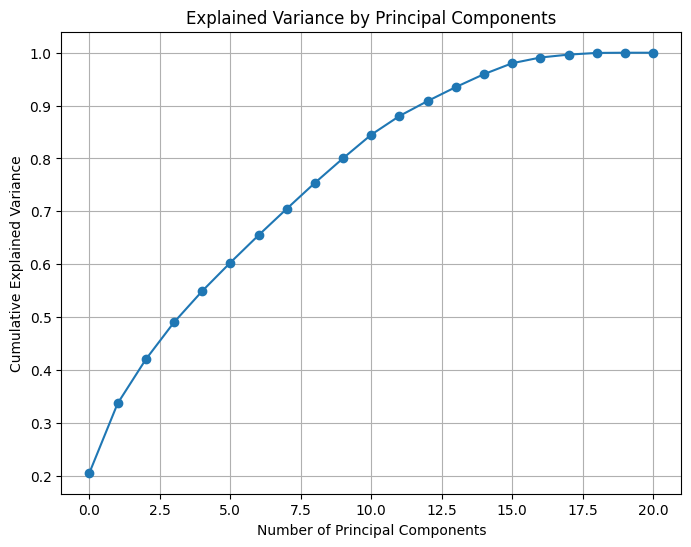

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [15]:
X_pca

array([[ 1.78608422, -1.82894978, -0.575744  , ..., -0.83854049,
        -0.24762376, -0.7628669 ],
       [ 1.8726874 , -1.78556566, -0.5759222 , ..., -1.01458593,
        -0.19387746, -0.66310712],
       [ 1.82536989, -1.96822373, -0.67146383, ..., -0.57702718,
        -0.25330887, -0.53776925],
       ...,
       [ 2.97706359,  1.49651995, -1.68760804, ...,  0.0377077 ,
         0.0492791 ,  0.99132603],
       [ 2.93035265,  1.1417835 , -1.72144926, ...,  0.1701185 ,
         0.0376278 ,  1.01032807],
       [ 3.00369408,  1.48877156, -1.7601991 , ...,  0.01506024,
         0.07279957,  1.09964282]])

In [40]:
feature_contributions = pd.DataFrame(pca.components_, columns=df_no_datetime.columns)
print("Feature contributions to the first principal component:")
print(feature_contributions.iloc[1])#.sort_values(ascending=False))

Feature contributions to the first principal component:
wtempc            -0.009142
atempc             0.113777
winddir_dcfn      -0.096928
precp_in          -0.051874
relh_pct          -0.426408
spc               -0.068915
dox_mgl            0.009311
ph                -0.040954
windgust_knots     0.506507
wse1988           -0.053126
wvel_fps           0.000689
mbars             -0.007410
windspeed_knots    0.476036
par                0.403546
turb_fnu          -0.014363
year               0.011357
month             -0.108663
day               -0.058926
hour               0.349351
minute             0.000365
second            -0.000000
Name: 1, dtype: float64


In [44]:
(pca.components_[0])
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings

# len(df_no_datetime.columns)

array([[-9.43767788e-01, -1.48033278e-02,  5.08461033e-02,
        -5.01439638e-02, -7.13441381e-02, -1.38038454e-02,
        -9.32200876e-02,  9.03434929e-04,  7.49470410e-02,
        -1.64051415e-02, -1.40402742e-01,  1.48905788e-01,
         6.10762133e-02,  5.04003950e-03, -8.26609133e-02,
        -1.10926455e-01,  5.08610398e-02, -1.11506404e-01,
        -2.13062391e-02,  6.24453590e-02,  0.00000000e+00],
       [-8.94737169e-01,  1.84234738e-01,  7.81880817e-02,
        -1.00835567e-01, -1.35506160e-01,  3.59455892e-02,
        -6.19913596e-02,  1.39047731e-03,  5.76628506e-02,
         4.08486881e-02, -9.22161207e-02,  5.96030232e-02,
        -4.32279906e-02,  5.09570861e-02, -8.04347064e-02,
        -1.15394691e-01,  1.61543320e-01,  2.33002457e-01,
         6.30974143e-02, -9.01867439e-03,  0.00000000e+00],
       [-5.43740983e-02, -1.56951285e-01, -5.04375565e-02,
        -9.19606327e-02,  2.18210328e-01, -3.05326854e-01,
        -3.75162736e-01,  1.45649128e-02,  5.97840134e